# INFERENCE:

### Maximum users who visited catalogue as well as web, have purchased "COIN"

1. The byuing Decision of user is completely depend on Action of the user.
   In Datasets given, we have action_type as one feature in Event Data.
   AND thats the only verticle that can show whether user has placed any order to purchase anything or not.

2. If the catalogue is observed then we have some different features like:

    . 'id'
    
    . 'product'
    
    . 'avlble'
    
    . 'discount_percentage'
    
    . 'goldkaratage'
    
    . 'out_of_shelf'
    
    . 'price'
    
    Those can be considered to predict/decide whether user will buy anything or not.

3. Catalogue Data and Event Data has very less co-relation.
   One has to tie them forcefully to draw some insights.    
   Here also they are forced to bound by Events "object_id" feature and Catalogue's "id" feature

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
pd.set_option('display.max_columns',60)

In [4]:
df_event = pd.read_csv('Event Data.csv',low_memory=False)
df_event.columns

Index(['action_type', 'user_type', 'epoch', 'object_id', 'user_id', 'sid',
       'og_url', 'tt_id', 'sub_account', 'utm_source', 'utm_campaign',
       'utm_medium', 'referrer', 'utm_content', 'latitude', 'longitude',
       'useragent', 'variant_id'],
      dtype='object')

##### Only "Object_id" seems to be related to join with catalogue Data

In [6]:
df_event = df_event[['object_id','action_type']]
df_event.head()

,object_id,action_type
0,Buy Engagement Rings Online - Shop Diamond Engagement Rings for Men and Women at Tanishq,view
1,500064ONAABB09,view
2,Buy Diamond Earrings Online in India | Shop Latest Diamond Earrings Designs Online | Tanishq,view
3,511250PGUAAA00,view
4,502112FHHLAJ54,view


In [7]:
df_cat = pd.read_csv('tanishq_products.csv')
df_cat.columns

Index(['_id', 'additional_image', 'adult', 'availability_date', 'avlble',
       'brand', 'business_unit', 'category', 'collection', 'color',
       'condition', 'created_on', 'currency', 'currency_symbol', 'description',
       'diamond_clarity', 'diamond_color', 'diamond_cut',
       'discount_percentage', 'expiration_date', 'full_description',
       'gemstone1', 'gemstone2', 'gemstone3', 'gemstone4', 'gemstone5',
       'gender', 'goldkaratage', 'google_product_category', 'gtin', 'height',
       'id', 'identifier_exists', 'image', 'item_group_id', 'jew_size',
       'jewellery_type', 'last_modified_on', 'listprice', 'metal',
       'metal_color', 'mfr_code', 'mpn', 'name', 'occasion', 'out_of_shelf',
       'price', 'price_usd', 'product', 'product_type', 'sale_price_usd',
       'status', 'sub_account', 'subcategories', 'trendrank', 'unit',
       'updated', 'url', 'variants', 'width'],
      dtype='object')

In [8]:
df_cat = df_cat[['id','product','avlble','discount_percentage','goldkaratage','out_of_shelf','price']]
df_cat.head()

,id,product,avlble,discount_percentage,goldkaratage,out_of_shelf,price
0,502998SBHAAA042JA000003,STUD EARRING,0,0,18.0,True,4431.0
1,552819GAHAAACZ2BD000278,Chain + Pendant,1,5,14.0,False,16149.0
2,502999FSZLAA022JA005106,FINGER RING,1,0,18.0,False,10988.0
3,505001SDWAGA092BD005443,STUD EARRING,1,0,18.0,False,7688.0
4,511183NVYAAA182BA805635,NECKLACE,1,0,22.0,False,200571.0


In [9]:
df_cat.rename(columns={'id':'object_id'},inplace=True)

#### Join Catalogue Data forcefully with the event Data 

In [10]:
# df_cat.head()
combined_df = pd.merge(df_event,df_cat,on='object_id')

In [11]:
combined_df['product'].unique()

array(['COINS', nan], dtype=object)

In [12]:
combined_df.action_type.unique()

array(['view', 'add_to_cart', 'remove_from_cart', 'add_to_wishlist',
       'place_order'], dtype=object)

#### Fetch only those records for which order has been placed

In [18]:
df_order_placed = combined_df[combined_df['action_type'] == 'place_order']

In [20]:
# df_order_placed.action_type = 1

In [19]:
df_order_placed

,object_id,action_type,product,avlble,discount_percentage,goldkaratage,out_of_shelf,price
148,600105ZGBRAS00,place_order,COINS,1,0,24.0,False,4719.0
151,600105ZGBRAS00,place_order,COINS,1,0,24.0,False,4719.0
155,600105ZGBRAS00,place_order,COINS,1,0,24.0,False,4719.0
172,600105ZGBRAS00,place_order,COINS,1,0,24.0,False,4719.0
2463,600209ZHAAAP00,place_order,COINS,1,0,22.0,False,8629.0
2481,600209ZHAAAP00,place_order,COINS,1,0,22.0,False,8629.0
2482,600209ZHAAAP00,place_order,COINS,1,0,22.0,False,8629.0
2770,600102ZNARAS00,place_order,COINS,1,0,24.0,False,4707.0
3025,600102ZNARAS00,place_order,COINS,1,0,24.0,False,4707.0
3472,600105ZBARAS00,place_order,COINS,1,0,24.0,False,23426.0


In [15]:
df_order_placed.corr()

,avlble,discount_percentage,goldkaratage,out_of_shelf,price
avlble,1.000000,NaN,0.093560,-0.687184,0.134636
discount_percentage,NaN,NaN,NaN,NaN,NaN
goldkaratage,0.093560,NaN,1.000000,0.180021,0.402434
out_of_shelf,-0.687184,NaN,0.180021,1.000000,-0.087100
price,0.134636,NaN,0.402434,-0.087100,1.000000


In [21]:
corr = df_order_placed.corr()

<AxesSubplot:>

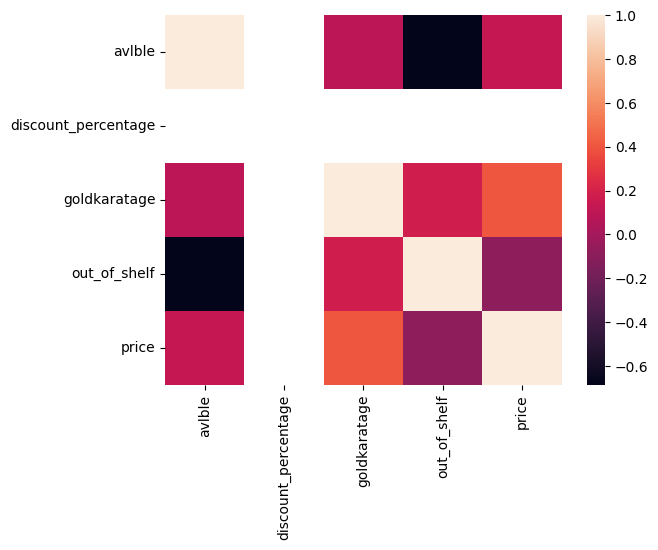

In [22]:
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)